In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV



#evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

Import semua library yang digunakan untuk mengerjakan project

# Data Loading

In [ ]:
!mkdir ~/.kaggle

membuat folder kaggle

In [ ]:
!cp '/content/kaggle.json' ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 19.3MB/s]


download dataset dari kaggle

In [ ]:
!unzip /content/heart-failure-prediction.zip

Archive:  /content/heart-failure-prediction.zip
  inflating: heart.csv               


In [ ]:
df= pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Dari output diatas dapat dilihat bahwa:
- Terdapat 918 baris dalam dataset
- terdapat 12 kolom, yaitu: Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Dapat dilihat bahwa terdapat beberapa informasi:
  - Terdapat 5 kolom dengan tipe data object, yaitu: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
  - There are 6 kolom numeric dengan tipe data int64, yaitu: Age, RestigBP, Cholesterol, FastingBS, MaxHR, HeartDisease
  - There is 1 kolom numeric dengan tipe data float64, yaitu Oldpeak

# Data Understanding

Project ini menggunakan dataset yang tersedia secara publik di Kaggle: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. Dataset ini berisi informasi tentang pasien gagal jantung dan dimaksudkan untuk digunakan dalam tugas pemodelan prediktif. Dataset terdiri dari 918 data.

Dataset ini dibuat dengan menggabungkan berbagai dataset yang sudah tersedia secara mandiri namun belum digabungkan sebelumnya. Dalam kumpulan data ini, 5 kumpulan data jantung digabungkan dalam 11 fitur umum yang menjadikannya kumpulan data penyakit jantung terbesar yang tersedia sejauh ini untuk tujuan penelitian.  Lima kumpulan data yang digunakan untuk kurasinya adalah:
- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations
  
Total: 1190 observations

Duplicated: 272 observations

Final dataset: 918 observations

### Variabel-variabel pada heart failur prediction dataset adalah sebagai berikut:
- Age: usia pasien [tahun]
- Sex: jenis kelamin pasien [M: Pria, F: Wanita]
- ChestPainType: jenis nyeri dada [TA: Typical Angina, ATA: Atypical Angina, NAP: -Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: tekanan darah istirahat [mm Hg]
- Cholesterol: kolesterol serum [mm/dl]
- FastingBS: gula darah puasa [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: hasil elektrokardiogram istirahat [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: detak jantung maksimum tercapai [Numeric value between 60 and 202]
- ExerciseAngina: angina akibat olahraga [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: kemiringan puncak latihan segmen ST [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: kelas keluaran [1: heart disease, 0: Normal]
--------------------------------------------------------------------------------------------------------------------------------------
- Terdapat 5 kolom dengan object types, yaitu: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope 
- Terdapat 6 kolom numeric dengan type int64, yaitu: Age, RestigBP, Cholesterol, FastingBS, MaxHR, HeartDisease
- Terdapat 1 kolom numeric dengan type float64, yaitu Oldpeak

# EDA

Mengecek missing values

In [ ]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Dapat dilihat bahwa tidak ada missing value untuk semua kolom

check statistics

In [ ]:
df.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


Dataset ini berisi informasi tentang pasien dengan potensi penyakit jantung, dengan beberapa temuan utama:

- Demografi: Rata-rata usia pasien adalah 53.5 tahun, mayoritas adalah pria (725 pasien).
- Klinis: 
    - Rata-rata tekanan darah istirahat 132.4 mmHg, kolesterol 198.8 mg/dL, dan denyut jantung maksimum 136.8 bpm.
    - Nilai tidak realistis, seperti tekanan darah dan kolesterol 0, menunjukkan adanya data yang perlu dibersihkan.
- Target: Data target biner (HeartDisease) menjadi fokus analisis prediksi.

In [ ]:
# Calculate the percentage of heart disease
hd_count = df['HeartDisease'].value_counts().reset_index(name='count')
hd_count.columns = ['HeartDisease', 'count']
hd_count['persentage'] = (hd_count['count'] / hd_count['count'].sum()) * 100
hd_count

,HeartDisease,count,persentage
0,1,508,55.337691
1,0,410,44.662309


Dari data ini, kita dapat menyimpulkan bahwa dalam dataset ini, lebih banyak individu yang terindikasi memiliki penyakit jantung (55,34%) dibandingkan mereka yang tidak memiliki penyakit jantung (44,66%).

## Univariatve Analysis

- Ctegorical Features = Sex, ChestPainType, FastingBs, RestingECG, ExerciseAngina:, ST_Slope, HeartDisease
- numerical features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']



In [ ]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Categorical Features

#### Feature Sex

     jumlah sampel  persentase
Sex                           
M              725        79.0
F              193        21.0


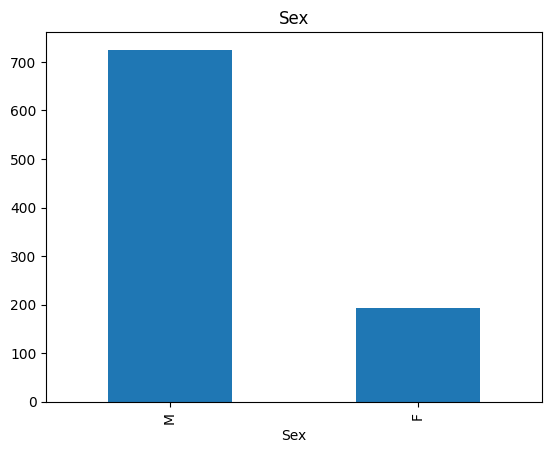

In [ ]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_percent = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_percent)
count.plot(kind='bar', title=feature);

Dalam dataset, mayoritas sampel dalam dataset adalah Pria dengan persentase 79.0%, sedangkan Wanita memiliki persentase 21.0%.

#### Feature ChestPainType

               jumlah sampel  persentase
ChestPainType                           
ASY                      496        54.0
NAP                      203        22.1
ATA                      173        18.8
TA                        46         5.0


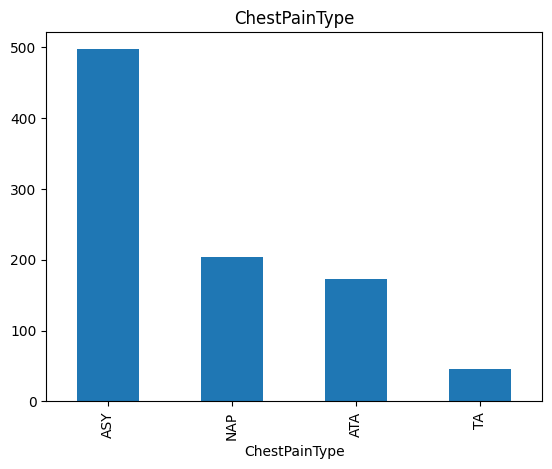

In [ ]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_percent = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_percent)
count.plot(kind='bar', title=feature);

- Terdapat 4 kategori pada fitur ChestPainType , yaitu TA: Typical Angina, ATA: Atypical Angina, NAP: -Non-Anginal Pain, ASY: Asymptomatic.  
- Mayoritas pasien dalam kumpulan data mengalami jenis nyeri dada tanpa gejala (ASY), yang mencapai 54,0% dari total sampel.  Diikuti oleh nyeri non-angina (NAP) dengan 22,1%, angina tipikal (ATA) dengan 18,8%, dan angina atipikal (TA) hanya 5,0% dari total sampel.

#### Feature FastingBS

           jumlah sampel  persentase
FastingBS                           
0                    704        76.7
1                    214        23.3


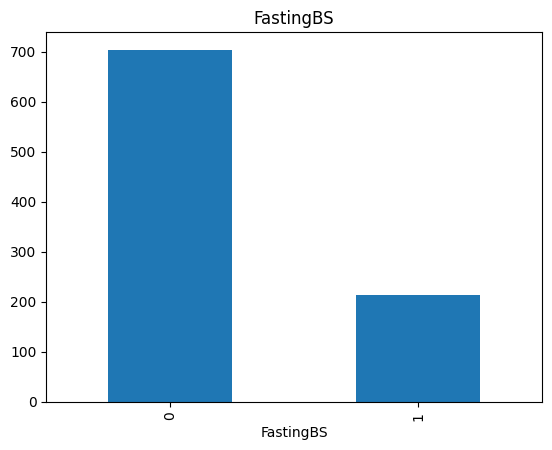

In [ ]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_percent = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_percent)
count.plot(kind='bar', title=feature);

Ada 2 kategori dalam fitur FastingBS, yaitu gula darah puasa 1: jika FastingBS > 120 mg/dl, 0: sebaliknya.
 Grafik batang juga menunjukkan distribusi kategori secara visual, dengan mayoritas pasien (76,7%) tidak berpuasa, sementara 23,3% dari total sampel berpuasa.  Analisis fitur “FastingBS” dapat menjadi faktor yang relevan dalam memahami prediksi gagal jantung.

#### RestingECG

            jumlah sampel  persentase
RestingECG                           
Normal                552        60.1
LVH                   188        20.5
ST                    178        19.4


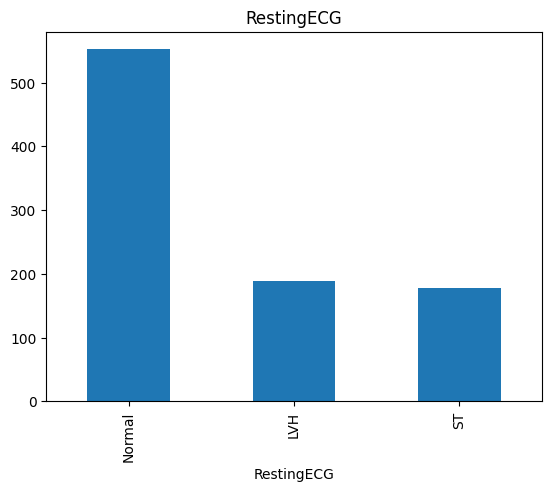

In [ ]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_percent = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_percent)
count.plot(kind='bar', title=feature);

Dari distribusi data RestingECG (Elektrokardiogram saat istirahat):

Kategori Normal (Normal):

552 sampel (60.1%) menunjukkan elektrokardiogram normal.
Ini adalah kategori terbesar, menunjukkan mayoritas pasien tidak memiliki kelainan elektrokardiogram saat istirahat.
Kategori LVH (Left Ventricular Hypertrophy):

188 sampel (20.5%) menunjukkan hipertrofi ventrikel kiri, yang bisa menjadi indikasi tekanan darah tinggi atau penyakit jantung.
Kategori ST:

178 sampel (19.4%) menunjukkan kelainan segmen ST, yang sering terkait dengan iskemia atau serangan jantung.
Kesimpulan: Mayoritas pasien memiliki elektrokardiogram normal, tetapi sekitar 40% menunjukkan kelainan (LVH atau ST), yang menjadi indikasi risiko penyakit jantung yang perlu ditangani lebih lanjut.

#### ExerciseAngina

                jumlah sampel  persentase
ExerciseAngina                           
N                         547        59.6
Y                         371        40.4


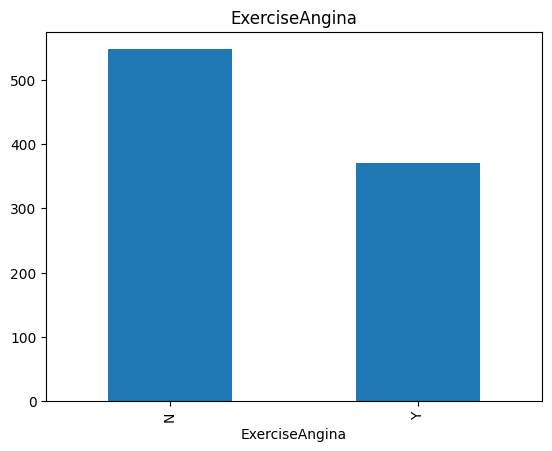

In [ ]:
feature = categorical_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_percent = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_percent)
count.plot(kind='bar', title=feature);

Dari distribusi data ExerciseAngina (Angina saat berolahraga):

Kategori N (Tidak Ada Angina):

547 sampel (59.6%) tidak mengalami angina saat berolahraga.
Ini menunjukkan mayoritas pasien tidak menunjukkan gejala angina terkait aktivitas fisik.
Kategori Y (Ada Angina):

371 sampel (40.4%) mengalami angina saat berolahraga.
Angka ini cukup signifikan, mengindikasikan bahwa hampir setengah dari pasien menunjukkan gejala angina saat aktivitas fisik, yang dapat menjadi indikator penting risiko penyakit jantung.
Kesimpulan: Mayoritas pasien tidak mengalami angina saat berolahraga, tetapi persentase yang mengalami angina cukup tinggi (40.4%), menunjukkan perlunya perhatian khusus terhadap kelompok ini dalam analisis prediksi penyakit jantung.

#### Feature ST_Slope

          jumlah sampel  persentase
ST_Slope                           
Flat                460        50.1
Up                  395        43.0
Down                 63         6.9


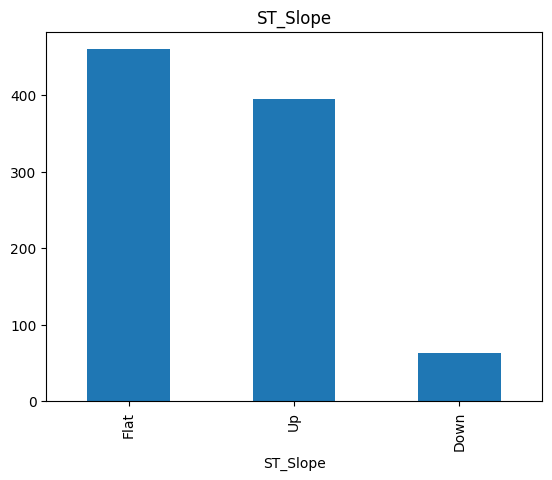

In [ ]:
feature = categorical_features[5]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_percent = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_percent)
count.plot(kind='bar', title=feature);

Mayoritas data memiliki kemiringan ST yang “Datar” (50,1%), diikuti oleh “Naik” (43,0%) dan “Turun” (6,9%).

### Numerical Features

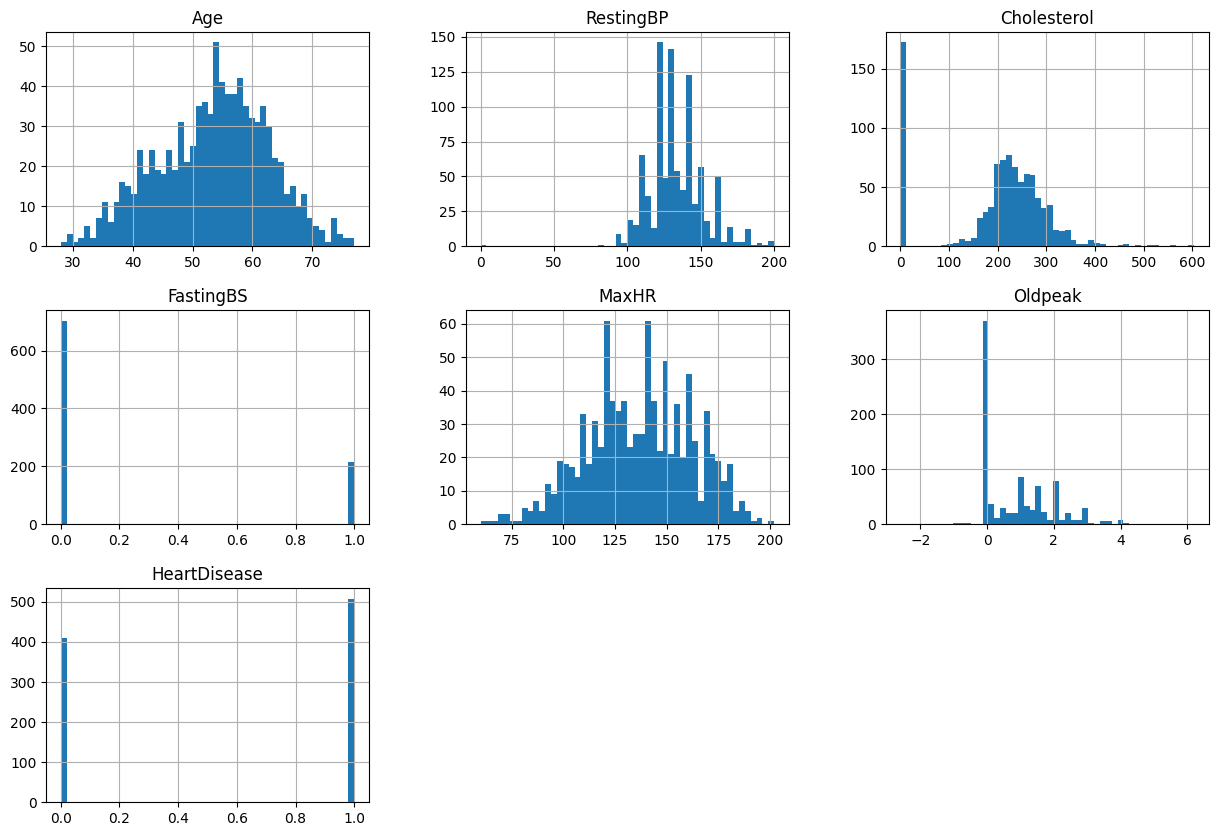

In [ ]:
df.hist(bins=50, figsize=(15,10))
plt.show()

- Distribusi usia menunjukkan bahwa sebagian besar individu dalam data berusia antara 40 dan 60 tahun.   Puncak tertinggi menunjukkan bahwa terdapat paling banyak orang berusia 54 tahun dalam set data.
- Distribusi tekanan darah istirahat Histogram pada kolom RestingBP menunjukkan bahwa sebagian besar orang dalam data memiliki tekanan darah istirahat yang normal (di bawah 120 mmHg).
- Distribusi detak jantung maksimum menunjukkan bahwa mayoritas orang dalam data memiliki detak jantung maksimum yang normal (antara 75 dan 150 bpm).
- Distribusi depresi ST (Oldpeak) menunjukkan bahwa mayoritas orang dalam data tidak memiliki depresi ST (0 mm).

In [ ]:
df_enc = df

In [ ]:
# encode all the categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#Encode Sex Feature
label_encoder.fit(df_enc["Sex"])
df_enc["Sex_en"] = label_encoder.fit_transform(df_enc["Sex"])
df_enc.drop("Sex",axis=1,inplace=True)

melakukan encoding fitur kategorikal

Encoding ini membantu algoritma machine learning memahami data kategorikal dengan mengubahnya menjadi representasi numerik. Teknik ini cocok untuk fitur kategorikal dengan jumlah kategori yang terbatas.

In [ ]:
#Encode ChestPainType feature
label_encoder.fit(df_enc["ChestPainType"])
df_enc["ChestPainType_en"] = label_encoder.fit_transform(df_enc["ChestPainType"])
df_enc.drop("ChestPainType",axis=1,inplace=True)
df_enc

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_en,ChestPainType_en
0,40,140,289,0,Normal,172,N,0.0,Up,0,1,1
1,49,160,180,0,Normal,156,N,1.0,Flat,1,0,2
2,37,130,283,0,ST,98,N,0.0,Up,0,1,1
3,48,138,214,0,Normal,108,Y,1.5,Flat,1,0,0
4,54,150,195,0,Normal,122,N,0.0,Up,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,Normal,132,N,1.2,Flat,1,1,3
914,68,144,193,1,Normal,141,N,3.4,Flat,1,1,0
915,57,130,131,0,Normal,115,Y,1.2,Flat,1,1,0
916,57,130,236,0,LVH,174,N,0.0,Flat,1,0,1


Dapat dilihat bahwa fitur ChestPainType  menjadi representasi numerik

In [ ]:
#Encode RestingECG feature
label_encoder.fit(df_enc["RestingECG"])
df_enc["RestingECG_en"] = label_encoder.fit_transform(df_enc["RestingECG"])
df_enc.drop("RestingECG",axis=1,inplace=True)
df_enc

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_en,ChestPainType_en,RestingECG_en
0,40,140,289,0,172,N,0.0,Up,0,1,1,1
1,49,160,180,0,156,N,1.0,Flat,1,0,2,1
2,37,130,283,0,98,N,0.0,Up,0,1,1,2
3,48,138,214,0,108,Y,1.5,Flat,1,0,0,1
4,54,150,195,0,122,N,0.0,Up,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,N,1.2,Flat,1,1,3,1
914,68,144,193,1,141,N,3.4,Flat,1,1,0,1
915,57,130,131,0,115,Y,1.2,Flat,1,1,0,1
916,57,130,236,0,174,N,0.0,Flat,1,0,1,0


Dapat dilihat bahwa fitur RestingECG menjadi representasi numerik

In [ ]:
label_encoder.fit(df_enc["ExerciseAngina"])
df_enc["ExerciseAngina_en"] = label_encoder.fit_transform(df_enc["ExerciseAngina"])
df_enc.drop("ExerciseAngina",axis=1,inplace=True)
df_enc

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_en,ChestPainType_en,RestingECG_en,ExerciseAngina_en
0,40,140,289,0,172,0.0,Up,0,1,1,1,0
1,49,160,180,0,156,1.0,Flat,1,0,2,1,0
2,37,130,283,0,98,0.0,Up,0,1,1,2,0
3,48,138,214,0,108,1.5,Flat,1,0,0,1,1
4,54,150,195,0,122,0.0,Up,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,Flat,1,1,3,1,0
914,68,144,193,1,141,3.4,Flat,1,1,0,1,0
915,57,130,131,0,115,1.2,Flat,1,1,0,1,1
916,57,130,236,0,174,0.0,Flat,1,0,1,0,0


In [ ]:
label_encoder.fit(df_enc["ST_Slope"])
df_enc["ST_Slope_en"] = label_encoder.fit_transform(df_enc["ST_Slope"])
df_enc.drop("ST_Slope",axis=1,inplace=True)
df_enc

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_en,ChestPainType_en,RestingECG_en,ExerciseAngina_en,ST_Slope_en
0,40,140,289,0,172,0.0,0,1,1,1,0,2
1,49,160,180,0,156,1.0,1,0,2,1,0,1
2,37,130,283,0,98,0.0,0,1,1,2,0,2
3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,3,1,0,1
914,68,144,193,1,141,3.4,1,1,0,1,0,1
915,57,130,131,0,115,1.2,1,1,0,1,1,1
916,57,130,236,0,174,0.0,1,0,1,0,0,1


Dapat dilihat bahwa fitur ST_Slope  menjadi representasi numerik

# Data Preprocessing

## Spliting Data

In [ ]:
from sklearn.model_selection import train_test_split

# feature & target
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

import train_test_split
membagi dataset menjadi 25% data uji dan 75% data latih

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 918
Total # of sample in train dataset: 688
Total # of sample in test dataset: 230


Dapat dilihat bahwa terdapat 688 data latih dan 230 data uji

### Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.23929215,  1.1838018 ,  1.3073138 , ...,  0.01149577,
         1.18203745, -0.604929  ],
       [ 0.23929215,  1.1838018 , -1.87799952, ...,  1.59331397,
        -0.84599688, -0.604929  ],
       [ 0.55896789,  0.91381054,  0.09652218, ...,  0.01149577,
        -0.84599688,  1.08005542],
       ...,
       [ 0.66552646, -0.16615451,  0.47838723, ...,  0.01149577,
         1.18203745,  1.08005542],
       [ 0.66552646,  1.02180704, -1.87799952, ...,  1.59331397,
         1.18203745,  1.08005542],
       [-1.46564508,  0.91381054,  1.77300288, ...,  0.01149577,
        -0.84599688, -0.604929  ]])

In [ ]:
#X_train[numerical_features].describe().round(4)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,688.0000,688.0000,688.0000,688.0000,688.0000
mean,0.0000,0.0000,0.0000,-0.0000,-0.0000
std,1.0007,1.0007,1.0007,1.0007,1.0007
min,-2.6378,-7.1859,-1.8780,-2.9249,-3.2052
25%,-0.7197,-0.7061,-0.2038,-0.7271,-0.8347
50%,0.0262,-0.1662,0.2083,0.0721,-0.2877
75%,0.6655,0.3738,0.6367,0.7515,0.6240
max,2.4770,3.6137,3.7382,2.2300,4.8180


# Modeling

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

inisialisasi n_neighbors dengan nilai 3

In [ ]:
print("Train Accuracy:",knn.score(X_train, y_train))
prediction = knn.predict(X_test)
print("Test Accuracy:",accuracy_score(prediction, y_test))
print("Classification Report",classification_report(y_test, prediction))

Train Accuracy: 0.9040697674418605
Test Accuracy: 0.8565217391304348
Classification Report               precision    recall  f1-score   support

           0       0.80      0.88      0.84        98
           1       0.90      0.84      0.87       132

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230



In [ ]:
rf =  RandomForestClassifier(n_estimators=70, random_state=42)
# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=70, random_state=42)

inisialisasi n_estimator atau pohon berjumlah 70
dan random state 42

In [ ]:
print("Train Accuracy:",rf.score(X_train, y_train))
prediction = rf.predict(X_test)
print("Test Accuracy:",accuracy_score(prediction, y_test))
print("Classification Report",classification_report(y_test, prediction))

Train Accuracy: 1.0
Test Accuracy: 0.8826086956521739
Classification Report               precision    recall  f1-score   support

           0       0.83      0.91      0.87        98
           1       0.93      0.86      0.89       132

    accuracy                           0.88       230
   macro avg       0.88      0.89      0.88       230
weighted avg       0.89      0.88      0.88       230



1. Akurasi Model
- Train Accuracy: 1.0 (100%)
- Model memiliki performa sempurna di data latih, tetapi ini mungkin menunjukkan potensi overfitting.
- Test Accuracy: 0.883 (88.26%)
- Akurasi cukup tinggi di data uji, menunjukkan model dapat memprediksi dengan baik, meskipun sedikit lebih rendah dibandingkan data latih.
2. Classification Report
- Precision, Recall, dan F1-Score:
- Kelas 0 (Negatif):
- Precision: 0.83 → 83% dari prediksi negatif benar.
- Recall: 0.91 → Model mampu menangkap 91% sampel negatif yang benar.
- F1-Score: 0.87 → Keseimbangan antara precision dan recall cukup baik.
- Kelas 1 (Positif):
- Precision: 0.93 → 93% dari prediksi positif benar.
- Recall: 0.86 → Model mampu menangkap 86% sampel positif yang benar.
- F1-Score: 0.89 → Hasilnya sedikit lebih baik dibandingkan kelas negatif.
3. Rata-rata Skor
- Akurasi Keseluruhan: 88% menunjukkan model cukup baik secara umum.
- Macro Avg dan Weighted Avg:
- Nilai-nilai ini konsisten di sekitar 0.88–0.89, mengindikasikan performa yang seimbang antar kelas.